# Nuestras Caras

Este código implementa una técnica de reconocimiento facial conocida como "Eigenfaces". 

La idea básica detrás de Eigenfaces es representar las caras de un conjunto de datos de entrenamiento en un espacio de características de dimensionalidad reducida utilizando el análisis de componentes principales (PCA). 

Luego, las nuevas caras se proyectan en este espacio de características y se comparan con las caras de entrenamiento para reconocerlas.

DEPENDENCIAS NECESARIAS:

Previo a ejecutar la notebook deben ser instaladas las siguientes dependencias:
* pip install opencv-python
* pip install pandas
* pip install matplotlib
* pip install scikit-learn

In [1]:
# Agrego esto para realizar algunas pruebas en otro directorio pero utilizando las funciones definidas por fede...
import os
import sys

# Obtener el path de ejecucion de la notebook
current_dir = os.getcwd()

# Define el nombre del proyecto
root_dir_name = "NuestrasCaras"

# Obtiene el path del proyecto
while not os.path.basename(current_dir) == root_dir_name:
    current_dir = os.path.dirname(current_dir)
    
# Agrega path a librerias
sys.path.append(current_dir)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from photo_30x30 import cortar_imagenes     # Función para recortar imagenes y pasar a grises
from pixels import intensidad_pixels    # Función para obtener la intensidad de los pixeles
import perceptrones as per        # Script con backpropagation

In [3]:
#********************************************************************************************************************
#                    CORTE DE LAS FOTOS Y CAMBIO DE ESCALA DE GRISES MEDIANTE PHOTO_30X30.PY
#********************************************************************************************************************
# Definimos donde se encuentran las fotos crudas y donde iran las grises 30x30
#current_directory = os.getcwd()
folder_name_raw = "input"
folder_name_output = "output"

# current_directory
# os.chdir(os.path.join(current_directory, "NuestrasCaras"))


# Cortar las fotos y cambiar a escala de grises
# cortar_imagenes(folder_name_raw, folder_name_output)


In [5]:
#********************************************************************************************************************
#                    OBTENCION DE LOS VALORES DE LOS PIXELES DE LAS FOTOS MEDIANTE PIXELS.PY
#********************************************************************************************************************
# Guardo la info de las fotos en un dataframe
folder_path_output = os.path.join(current_dir, folder_name_output) #os.path.join(os.getcwd(), folder_name_output)
data_fotos = intensidad_pixels(folder_path_output)

# Get the file names
file_names = data_fotos.iloc[:, 0]

# Tomo los nombres de cada persona
people_names = [name.split("-")[0] for name in file_names]

# Tomo las escalas de grises y divido por 255 para normalizar
greyscale_values = data_fotos.iloc[:, 1:].values/255.0

#********************************************************************************************************************
# Separamos los data sets en training y test
#********************************************************************************************************************
# Mediante el parametro "stratify" nos aseguramos que se tomen todos los nombres
X_train, X_test, nombres_y_train, nombres_y_test = train_test_split(greyscale_values, people_names, test_size=0.2, random_state=42, stratify=people_names)

# Transformo los nombres a números (0-1) usando label binarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(nombres_y_train)
y_train_labels = lb.classes_
y_test = LabelBinarizer().fit_transform(nombres_y_test)
y_test_labels = lb.classes_

#********************************************************************************************************************

In [6]:
# Dimensiones del array
people_names = np.array(people_names)
people_names.shape

greyscale_values = np.array(greyscale_values)
greyscale_values.shape


(226, 900)

Text(0.5, 1.0, 'Cara Promedio')

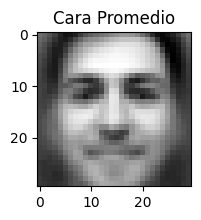

In [7]:
# obtiene y mustra la cara promedio
cara_promedio = np.mean(greyscale_values, axis=0)
cara_promedio.shape
plt.figure(figsize=(3, 2))
plt.imshow(cara_promedio.reshape(30,30),cmap="gray")
plt.title('Cara Promedio')

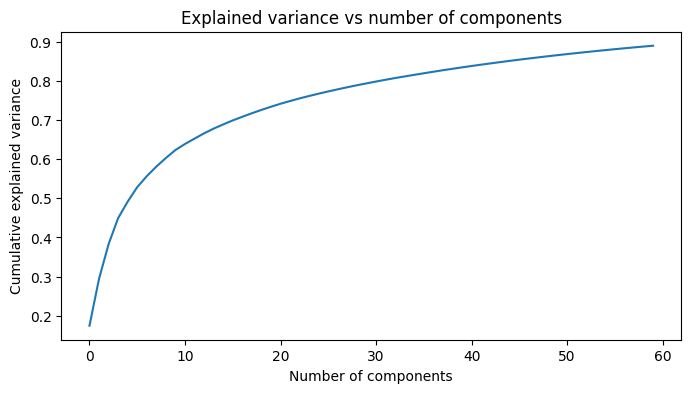

In [8]:
#********************************************************************************************************************
#                    PCA
#********************************************************************************************************************
# Se aplica PCA a las imagenes
# IMPORTANTE! al aumentar el nro de componentes tambien aumenta la precision en la comparacion de imagenes para la clasificacion al final de la notebook!
# Tiene sentido porque aumento el porcentaje de variabilidad explicada por las componentes, acercandome mas a la realidad
n_pca = 60
pca = PCA(n_components=n_pca).fit(X_train)
X_train_pca = pca.fit_transform(X_train)

eigenfaces = pca.components_
varianza_explicada = pca.explained_variance_ratio_

# plot explained variance (grafico continuo)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(varianza_explicada))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()


Se observa que con aproximadamente 40 CP explicamos el 80% de la varianza. Y con 60 CP, nos acercamos al 90%.

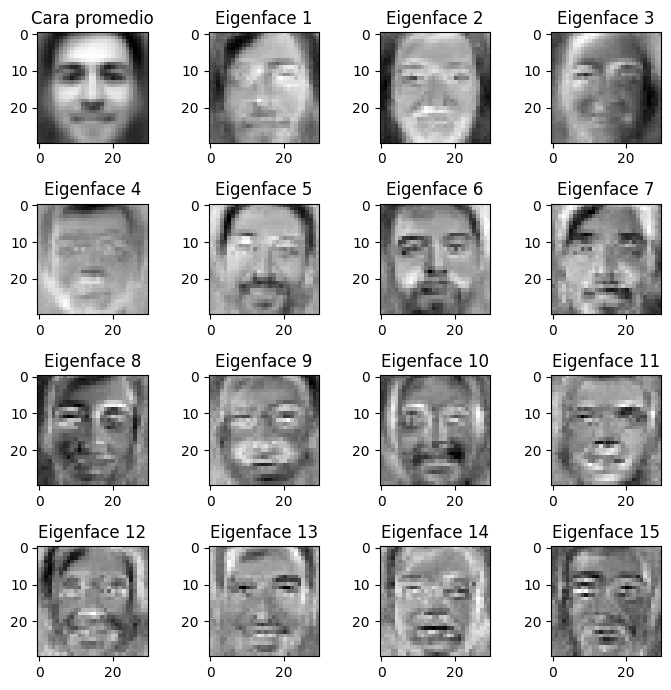

In [9]:
#********************************************************************************************************************
#                    GRAFICO DE LAS PRIMERAS 15 EIGENFACES
#********************************************************************************************************************

fig, ax = plt.subplots(4, 4, figsize=(7, 7))

ax[0, 0].imshow(cara_promedio.reshape(30,30), cmap="gray")
ax[0, 0].set_title("Cara promedio")

for i in range(0,15): # primeras 15 pca
    ax[(i+1) // 4, (i+1) % 4].imshow(eigenfaces[i].reshape(30,30), cmap="gray")
    ax[(i+1) // 4, (i+1) % 4].set_title(f"Eigenface {i+1}")

#plot dimensions
plt.tight_layout()
plt.show()

### Entrenamiento de la red neuronal con backpropagation
Comienza inicializando las matrices de pesos de manera aleatoria y realizando la propagación hacia adelante para obtener las salidas de la red. Luego, se calcula el error promedio y se inicia un bucle de entrenamiento que continúa hasta que se cumpla un criterio de convergencia o se alcance el límite de épocas. En cada iteración, se realiza la propagación hacia adelante y hacia atrás para ajustar los pesos mediante la corrección de errores. El proceso se repite hasta que se alcance la convergencia o el límite de épocas, mostrando el número de época y el valor del error en cada iteración.

In [10]:
#********************************************************************************************************************
# AHORA TENEMOS QUE USAR EL BACKPROPAGATION 
#********************************************************************************************************************


In [11]:
'''DEJO ESTE BLOQUE COMO COMENTARIO YA QUE DEMORA MUCHO EN CORRER

# Evaluamos la mejor combinacion de neuronas en las capas ocultas 1 y 2 (DEMORA MUCHO!)

# Creo una lista vacia para ir guardando los resultados
resultados = []

# Creo tres loops: 
# uno para la cantidad de neuronas en la capa 1, 
# otro para la cantidad de neuronas en la capa 2,
# y otro para la cantidad de fotos del test set

import time

for i in range(1,36):
    for j in range(1,36):
        start_time = time.time()
        red_neuronal = per.backpropagation_2_capas(X_train_pca, y_train, i, j, 2000, 1.0e-6, 0.3)
        pesos = red_neuronal[:6]
        aciertos = 0
        # tiempo de ejecucion
        tiempo = time.time() - start_time
        # epoch y error
        epoch = red_neuronal[-1]
        error = red_neuronal[-2]
        # Recorro las fotos del test set
        for k in range(0, len(y_test)):
            foto_prueba = X_test[k]
            foto_prueba_pca = pca.transform(foto_prueba.reshape(1, -1))
            prediccion = per.predecir_clase_2_capas(pesos, foto_prueba_pca)
            # Si la prediccion es correcta, suma 1 en aciertos
            if prediccion[-1] == np.where(y_test[k]==1)[0][0]:
                aciertos += 1
        # El porcentaje acertado
        aciertos_pct = round(aciertos/len(y_test)*100,2)
        # Imprime combinacion de neuronas y aciertos
        print(f"*** Neuronas en primera capa: {i} *** Neuronas en segunda capa: {j} >>> Aciertos: {aciertos} ({aciertos_pct}%)")
        print('')
        # Guarda los resultados de esta combinacion en la lista
        resultados.append((i, j, tiempo, epoch, error, aciertos, aciertos_pct))



#********************************************************************************************************************
# Tarda tanto en correr que guardo los resultados en un archivo externo

# Guardo los resultados en un dataframe
resultados_df = pd.DataFrame(resultados, columns=["Neuronas_1", "Neuronas_2", "Tiempo", "Epoch", "Error", "Aciertos", "Porcentaje_Aciertos"])

# Guardo el dataframe en un archivo csv
resultados_df.to_csv("test_backpropagation.csv", index=False)

'''

'DEJO ESTE BLOQUE COMO COMENTARIO YA QUE DEMORA MUCHO EN CORRER\n\n# Evaluamos la mejor combinacion de neuronas en las capas ocultas 1 y 2 (DEMORA MUCHO!)\n\n# Creo una lista vacia para ir guardando los resultados\nresultados = []\n\n# Creo tres loops: \n# uno para la cantidad de neuronas en la capa 1, \n# otro para la cantidad de neuronas en la capa 2,\n# y otro para la cantidad de fotos del test set\n\nimport time\n\nfor i in range(1,36):\n    for j in range(1,36):\n        start_time = time.time()\n        red_neuronal = per.backpropagation_2_capas(X_train_pca, y_train, i, j, 2000, 1.0e-6, 0.3)\n        pesos = red_neuronal[:6]\n        aciertos = 0\n        # tiempo de ejecucion\n        tiempo = time.time() - start_time\n        # epoch y error\n        epoch = red_neuronal[-1]\n        error = red_neuronal[-2]\n        # Recorro las fotos del test set\n        for k in range(0, len(y_test)):\n            foto_prueba = X_test[k]\n            foto_prueba_pca = pca.transform(foto_pr

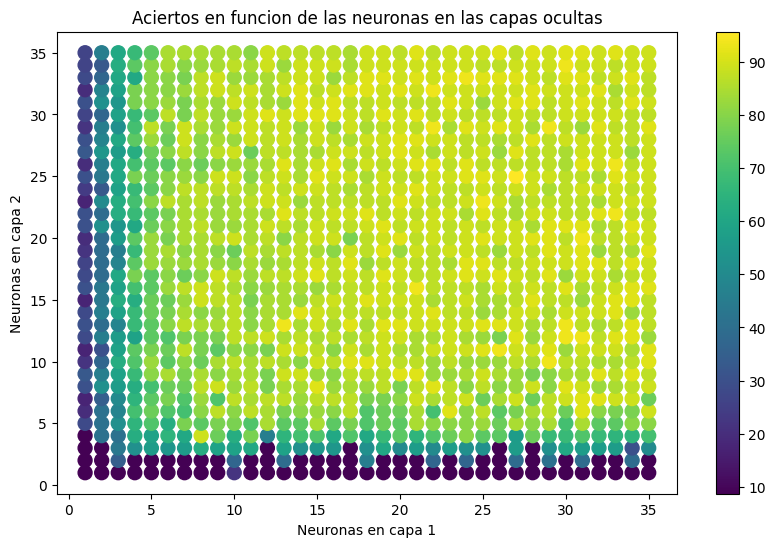

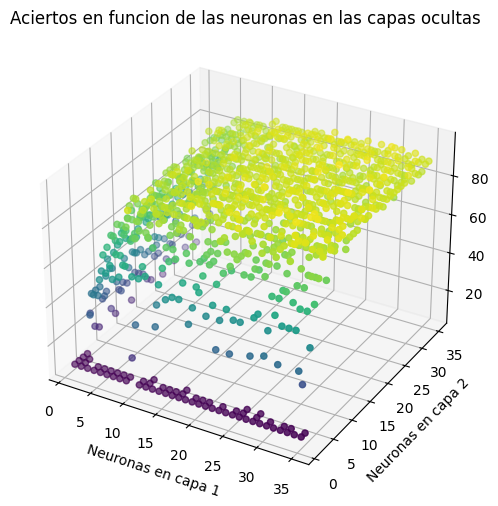

In [13]:
# Graficamos los resultados de la evaluacion de las neuronas en las capas ocultas
# Abrir csv
resultados = pd.read_csv(os.path.join(current_dir, "test_backpropagation.csv"))

# Paso a numpy array
resultados = np.array(resultados)

# Tomos los porcentajes de aciertos
resultados_pct = resultados[:,6]

# Ploteo en un grafico 2D
plt.figure(figsize=(10, 6))
plt.scatter(resultados[:,0], resultados[:,1], c=resultados_pct, cmap='viridis', s=100)
plt.colorbar()
plt.xlabel('Neuronas en capa 1')
plt.ylabel('Neuronas en capa 2')
plt.title('Aciertos en funcion de las neuronas en las capas ocultas')
plt.show()

# Ploteo en un grafico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(resultados[:,0], resultados[:,1], resultados_pct, c=resultados_pct, cmap='viridis')
ax.set_xlabel('Neuronas en capa 1')
ax.set_ylabel('Neuronas en capa 2')
ax.set_zlabel('Aciertos (%)')
plt.title('Aciertos en funcion de las neuronas en las capas ocultas')
plt.show()

#********************************************************************************************************************





In [14]:
# Armo un ranking de las 20 mejores combinaciones segun el porcentaje de aciertos

# Me quedo solo con los valores de cada capa y el porcentaje de aciertos
ranking = resultados[:,[0,1,6]]
# Ordeno de mayor a menor porcentaje de aciertos
ranking = ranking[ranking[:,2].argsort()[::-1]]
# Me quedo con las mejores
ranking = ranking[:20]
print(ranking)

# Nos quedamos con la mejor combinacion de neuronas en las capas ocultas
# Podemos elegir si quedarnos con muchas neuronas en cada capa o reducirlo un poco



[[27.   25.   95.65]
 [22.   29.   93.48]
 [13.   13.   93.48]
 [33.   26.   93.48]
 [22.   32.   93.48]
 [24.   33.   93.48]
 [25.   23.   93.48]
 [29.   10.   93.48]
 [26.   11.   93.48]
 [29.   29.   93.48]
 [31.   20.   93.48]
 [21.   16.   93.48]
 [31.   12.   93.48]
 [33.   22.   93.48]
 [30.   13.   93.48]
 [30.   12.   93.48]
 [30.   34.   93.48]
 [23.    6.   91.3 ]
 [24.   25.   91.3 ]
 [29.   11.   91.3 ]]


In [15]:
#********************************************************************************************************************
# El mejor modelo
#********************************************************************************************************************
neuronas_1_best = 27
neuronas_2_best = 25

# Entrenamos el mejor modelo
red_neuronal_best = per.backpropagation_2_capas(X_train_pca, y_train, neuronas_1_best, neuronas_2_best, 2000, 1.0e-6, 0.3)
pesos_best = red_neuronal_best[:6]

#********************************************************************************************************************
# Evaluamos el mejor modelo

aciertos = 0
status = "error"
# Recorro las fotos del test set
for k in range(0, len(y_test)):
    foto_prueba = X_test[k]
    foto_prueba_pca = pca.transform(foto_prueba.reshape(1, -1))
    prediccion = per.predecir_clase_2_capas(pesos_best, foto_prueba_pca)
    # Si la prediccion es correcta, suma 1 en aciertos
    if prediccion[-1] == np.where(y_test[k]==1)[0][0]:
        aciertos += 1
        status = "OK"
    print(f"Prediccion: {nombres_y_test[prediccion[-1]]} - Real: {nombres_y_test[np.where(y_test[k]==1)[0][0]]} - {status}")


# El porcentaje acertado
aciertos_pct = round(aciertos/len(y_test)*100,2)
# Imprime combinacion de neuronas y aciertos
print(f">>> Aciertos: {aciertos} ({aciertos_pct}%)")

Error inicial: 0.2925037048788278
Epoch: 188, Error: 0.00044649702549322094
Prediccion: Matias - Real: Paola - error
Prediccion: Noelia - Real: Noelia - OK
Prediccion: Federico R - Real: Federico R - OK
Prediccion: Federico G - Real: Federico G - OK
Prediccion: Matias - Real: Matias - OK
Prediccion: Victorio - Real: Victorio - OK
Prediccion: Franco A - Real: Franco A - OK
Prediccion: Federico G - Real: Federico G - OK
Prediccion: Matias - Real: Matias - OK
Prediccion: Juan - Real: Juan - OK
Prediccion: Noelia - Real: Noelia - OK
Prediccion: Federico G - Real: Federico G - OK
Prediccion: Paola - Real: Paola - OK
Prediccion: Matias - Real: Paola - OK
Prediccion: Joaquin - Real: Joaquin - OK
Prediccion: Paola - Real: Paola - OK
Prediccion: Paola - Real: Paola - OK
Prediccion: Matias - Real: Matias - OK
Prediccion: Federico G - Real: Federico G - OK
Prediccion: Gustavo - Real: Gustavo - OK
Prediccion: Franco A - Real: Juan - OK
Prediccion: Victorio - Real: Victorio - OK
Prediccion: Paola -

In [16]:
# Prueba: Quitamos las primeras 3 CP

# Retiro las primeras 3 componentes
X_menos_3 = X_train_pca[:, 3:]
X_menos_3.shape

red_neuronal_best = per.backpropagation_2_capas(X_menos_3, y_train, 7, 32, 2000, 1.0e-6, 0.3)
pesos_best = red_neuronal_best[:6]

Error inicial: 0.31413400170446903
Epoch: 264, Error: 0.0004604272833213143


In [17]:
# Prueba 2: Restamos la cara promedio


## Prueba Lautaro (estandarizar)

Ajusto directamente una red con varias neuronas por capa a partir de los resultados de Fede... 

In [18]:
# importo librerias
from sklearn.preprocessing import StandardScaler
from backpropagation_test import backpropagation_2_layers, evaluate_predictions

In [19]:
# obtener CP
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# check dims
# print(X_train.shape)
# print(X_train.shape)
# print("\n")
# print(X_train_pca.shape)
# print(X_test_pca.shape)
# print("\n")
# print(y_train.shape)
# print(y_test.shape)

# estandarizo (media 0 y variancia 1)
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)
# print("\n")
# print(X_train_pca_scaled.shape)
# print(X_test_pca_scaled.shape)

# verifico estand
# print("\n")
# print(X_train[:,0].mean())
# print(X_train[:,0].var())
# print("\n")
# print(X_train_pca[:,0].mean())
# print(X_train_pca[:,0].var())
# print("\n")
# print(X_train_pca_scaled[:,0].mean())
# print(X_train_pca_scaled[:,0].var())

#
#plt.imshow(X_train[0,:].reshape(30,30),cmap="gray")

In [20]:
weights_dict = backpropagation_2_layers(X = X_train_pca_scaled, Y = y_train, hidden_size1 = 35, hidden_size2= 25)

Iteracion 1 - Error: 0.052255682212524704
Iteracion 2 - Error: 0.05160753136676442
Iteracion 3 - Error: 0.050388195377102166
Iteracion 4 - Error: 0.04745611358109939
Iteracion 5 - Error: 0.04215363968500899
Iteracion 6 - Error: 0.0347439825672866
Iteracion 7 - Error: 0.024489940261776
Iteracion 8 - Error: 0.017255658015535497
Iteracion 9 - Error: 0.011455614436401277
Iteracion 10 - Error: 0.007869528218995685
Iteracion 11 - Error: 0.005503377730349033
Iteracion 12 - Error: 0.0035972161333145576
Iteracion 13 - Error: 0.002371461492759875
Iteracion 14 - Error: 0.001717069772876362
Iteracion 15 - Error: 0.001346297123476847
Iteracion 16 - Error: 0.001107029369379754
Iteracion 17 - Error: 0.0009406364676020583
Iteracion 18 - Error: 0.0008183596901304141
Iteracion 19 - Error: 0.0007244405809684091
Iteracion 20 - Error: 0.0006498495559412712
Iteracion 21 - Error: 0.000589071201736553
Iteracion 22 - Error: 0.0005385394681074117
Iteracion 23 - Error: 0.0004958383264647043
Iteracion 24 - Error:

In [21]:
#from backpropagation_lautaro import get_predictions
#preds = get_predictions(X_test_pca_scaled, weights_dict)

In [22]:
df_results = evaluate_predictions(x_new = X_test_pca_scaled, y_labels=y_test_labels, y_value=np.array(nombres_y_test), weights_dict=weights_dict)

In [23]:
df_results

,Valor máximo,Nombre de la columna,Nombre verdadero
0,0.072446,Noelia,Noelia
1,0.995141,Matias,Matias
2,0.985508,Juan,Juan
3,0.998072,Victorio,Victorio
4,0.995684,Federico G,Federico G
5,0.956520,Florencia,Florencia
6,0.957309,Lisandro,Lisandro
7,0.930371,Joaquin,Joaquin
8,0.995236,Federico G,Federico G
9,0.996078,Federico R,Federico R


In [24]:
# mal clasificados
df_results[df_results["Nombre de la columna"]!=df_results["Nombre verdadero"]]

,Valor máximo,Nombre de la columna,Nombre verdadero
20,0.136907,Gerard,Federico R
34,0.351532,Franco A,Matias
42,0.088261,Gerard,Carlos


In [25]:
# Error
(df_results[df_results["Nombre de la columna"]==df_results["Nombre verdadero"]]).shape[0] / df_results.shape[0] * 100

93.47826086956522

## Prueba sin estandarizar

In [78]:
weights_dict_sin_estand = backpropagation_2_layers(X = X_train_pca, Y = y_train, hidden_size1 = 35, hidden_size2= 25)

Iteracion 1 - Error: 0.051878825951030126
Iteracion 2 - Error: 0.05047545284454912
Iteracion 3 - Error: 0.048055906077125794
Iteracion 4 - Error: 0.04363603654177279
Iteracion 5 - Error: 0.039017171012341305
Iteracion 6 - Error: 0.034148421552749636
Iteracion 7 - Error: 0.026723308412752476
Iteracion 8 - Error: 0.021418301137518202
Iteracion 9 - Error: 0.016969957136300447
Iteracion 10 - Error: 0.013221060351959793
Iteracion 11 - Error: 0.010463886900646304
Iteracion 12 - Error: 0.008427423329660962
Iteracion 13 - Error: 0.006744174093958747
Iteracion 14 - Error: 0.0053189078674039806
Iteracion 15 - Error: 0.004223817658520031
Iteracion 16 - Error: 0.003379164650391687
Iteracion 17 - Error: 0.002677389064239966
Iteracion 18 - Error: 0.0021497754100682576
Iteracion 19 - Error: 0.0017779732002098925
Iteracion 20 - Error: 0.0015222228115367416
Iteracion 21 - Error: 0.0013414256642393602
Iteracion 22 - Error: 0.0012057903919202027
Iteracion 23 - Error: 0.0011007530836431732
Iteracion 24 - 

In [79]:
df_results_sin_estand = evaluate_predictions(x_new = X_test_pca, y_labels=y_test_labels, y_value=np.array(nombres_y_test), weights_dict=weights_dict_sin_estand)

In [80]:
df_results_sin_estand

,Valor máximo,Nombre de la columna,Nombre verdadero
0,0.975481,Noelia,Noelia
1,0.991840,Matias,Matias
2,0.993398,Juan,Juan
3,0.998352,Victorio,Victorio
4,0.995102,Federico G,Federico G
5,0.973587,Florencia,Florencia
6,0.705523,Lisandro,Lisandro
7,0.980822,Joaquin,Joaquin
8,0.994875,Federico G,Federico G
9,0.996404,Federico R,Federico R


In [81]:
# mal clasificados
df_results_sin_estand[df_results_sin_estand["Nombre de la columna"]!=df_results_sin_estand["Nombre verdadero"]]

,Valor máximo,Nombre de la columna,Nombre verdadero
20,0.546563,Matias,Federico R
34,0.306606,Franco A,Matias
40,0.045943,Franco S,Gerard


In [82]:
# Error
(df_results_sin_estand[df_results_sin_estand["Nombre de la columna"]==df_results_sin_estand["Nombre verdadero"]]).shape[0] / df_results_sin_estand.shape[0] * 100

93.47826086956522

## Prueba sin las 3 primeras CP

In [42]:
X_train_pca[:,3].var()

1.4123107223623876

In [45]:
a = X_train_pca[:,3:]
a[:,0].var()

1.4123107223623876

In [46]:
weights_dict_test2 = backpropagation_2_layers(X = X_train_pca_scaled[:,2:], Y = y_train, hidden_size1 = 35, hidden_size2= 25)

Iteracion 1 - Error: 0.05243486341699369
Iteracion 2 - Error: 0.051975098277889216
Iteracion 3 - Error: 0.05121659867082463
Iteracion 4 - Error: 0.049728456410464125
Iteracion 5 - Error: 0.04665856011278131
Iteracion 6 - Error: 0.04169039229532469
Iteracion 7 - Error: 0.03312553409681189
Iteracion 8 - Error: 0.022731410543526728
Iteracion 9 - Error: 0.014946918089380354
Iteracion 10 - Error: 0.010249505129553861
Iteracion 11 - Error: 0.006545174402975767
Iteracion 12 - Error: 0.004290986949741209
Iteracion 13 - Error: 0.0029087121372763113
Iteracion 14 - Error: 0.002096538223643698
Iteracion 15 - Error: 0.0016234439072618492
Iteracion 16 - Error: 0.0013076469819128388
Iteracion 17 - Error: 0.001083918001390568
Iteracion 18 - Error: 0.0009230525376663134
Iteracion 19 - Error: 0.0008038489538187253
Iteracion 20 - Error: 0.0007121878639791033
Iteracion 21 - Error: 0.0006394006496329433
Iteracion 22 - Error: 0.0005800873632733275
Iteracion 23 - Error: 0.0005307493215629868
Iteracion 24 - E

In [47]:
df_results_test2 = evaluate_predictions(x_new = X_test_pca_scaled[:,2:], y_labels=y_test_labels, y_value=np.array(nombres_y_test), weights_dict=weights_dict_test2)

In [48]:
df_results_test2

,Valor máximo,Nombre de la columna,Nombre verdadero
0,0.182227,Noelia,Noelia
1,0.997096,Matias,Matias
2,0.925569,Juan,Juan
3,0.997847,Victorio,Victorio
4,0.971304,Federico G,Federico G
5,0.647498,Florencia,Florencia
6,0.635083,Lisandro,Lisandro
7,0.944629,Joaquin,Joaquin
8,0.952634,Federico G,Federico G
9,0.984734,Federico R,Federico R


In [49]:
# mal clasificados
df_results_test2[df_results_test2["Nombre de la columna"]!=df_results_test2["Nombre verdadero"]]

,Valor máximo,Nombre de la columna,Nombre verdadero
21,0.079526,Franco A,Florencia
34,0.644185,Franco A,Matias
40,0.207844,Federico G,Gerard
42,0.249480,Marco,Carlos


In [76]:
# Error
(df_results_test2[df_results_test2["Nombre de la columna"]==df_results_test2["Nombre verdadero"]]).shape[0] / df_results_test2.shape[0] * 100

91.30434782608695

## Prueba restando la cara promedio

In [59]:
# cara promedio
cara_promedio = cara_promedio.reshape(1,900)
cara_promedio.reshape(1,900).shape

(1, 900)

In [60]:
X_train.shape

(180, 900)

In [61]:
X_train_pca.shape

(180, 60)

In [65]:
cara_promedio_pca = pca.transform(cara_promedio)
cara_promedio_pca.shape

(1, 60)

In [69]:
X_train_pca_2 = X_train_pca - cara_promedio_pca
X_train_pca_2.shape

(180, 60)

In [71]:
X_test_pca_2 = X_test_pca - cara_promedio_pca
X_test_pca_2.shape

(46, 60)

In [70]:
weights_dict_test3 = backpropagation_2_layers(X = X_train_pca_2, Y = y_train, hidden_size1 = 35, hidden_size2= 25)

Iteracion 1 - Error: 0.051879654749136445
Iteracion 2 - Error: 0.05048036191491387
Iteracion 3 - Error: 0.04806662409382839
Iteracion 4 - Error: 0.043658415305787734
Iteracion 5 - Error: 0.03903857775666073
Iteracion 6 - Error: 0.03414058949338712
Iteracion 7 - Error: 0.026726658434020428
Iteracion 8 - Error: 0.021425869176847995
Iteracion 9 - Error: 0.016975395831009096
Iteracion 10 - Error: 0.013224414884000528
Iteracion 11 - Error: 0.01046753235743321
Iteracion 12 - Error: 0.008429971242314517
Iteracion 13 - Error: 0.006747361847571638
Iteracion 14 - Error: 0.005321728321924651
Iteracion 15 - Error: 0.004227761091574821
Iteracion 16 - Error: 0.0033833457326523644
Iteracion 17 - Error: 0.0026810637792628964
Iteracion 18 - Error: 0.0021526312768732803
Iteracion 19 - Error: 0.0017800435610175118
Iteracion 20 - Error: 0.0015238137049269182
Iteracion 21 - Error: 0.0013427839143504605
Iteracion 22 - Error: 0.0012069497152799463
Iteracion 23 - Error: 0.001101718114096843
Iteracion 24 - Err

In [72]:
df_results_test3 = evaluate_predictions(x_new = X_test_pca_2, y_labels=y_test_labels, y_value=np.array(nombres_y_test), weights_dict=weights_dict_test3)

In [73]:
df_results_test3

,Valor máximo,Nombre de la columna,Nombre verdadero
0,0.975580,Noelia,Noelia
1,0.991722,Matias,Matias
2,0.993494,Juan,Juan
3,0.998342,Victorio,Victorio
4,0.995113,Federico G,Federico G
5,0.974726,Florencia,Florencia
6,0.705033,Lisandro,Lisandro
7,0.980937,Joaquin,Joaquin
8,0.994897,Federico G,Federico G
9,0.996474,Federico R,Federico R


In [74]:
# mal clasificados
df_results_test3[df_results_test3["Nombre de la columna"]!=df_results_test3["Nombre verdadero"]]

,Valor máximo,Nombre de la columna,Nombre verdadero
20,0.514686,Matias,Federico R
34,0.305605,Franco A,Matias
40,0.045053,Franco S,Gerard


In [77]:
# Error
(df_results_test3[df_results_test3["Nombre de la columna"]==df_results_test3["Nombre verdadero"]]).shape[0] / df_results_test3.shape[0] * 100

93.47826086956522